The value of d that minimizes the KL divergence is: 1.5294361008097714


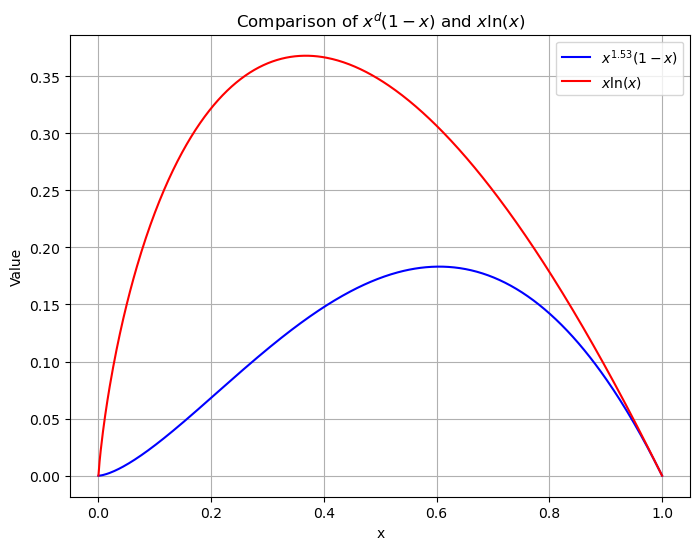

In [7]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define p(x) and q(x)
def p_x(x, d):
    return x**d * (1 - x)

def q_x(x):
    return -x * np.log(x + 1e-10)  # Adding a small value to avoid log(0)

# Define the KL divergence function to minimize
def kl_divergence(d):
    # Integrand for KL divergence
    def integrand(x, d):
        p = p_x(x, d)
        q = q_x(x)
        return p * np.log((p + 1e-10) / (q + 1e-10))  # Avoid division by zero
    # Compute the KL divergence over the range [1e-5, 1 - 1e-5] to avoid boundaries
    kl_value, _ = quad(integrand, 1e-5, 1 - 1e-5, args=(d))
    return kl_value

# Minimize the KL divergence to find the best d
result = minimize(kl_divergence, x0=1.0)  # Initial guess for d
optimal_d = result.x[0]
print(f"The value of d that minimizes the KL divergence is: {optimal_d}")

# Plot the two functions for comparison
x_vals = np.linspace(1e-5, 1 - 1e-5, 500)
p_vals = p_x(x_vals, optimal_d)
q_vals = q_x(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, p_vals, label=f"$x^{{{optimal_d:.2f}}}(1 - x)$", color="blue")
plt.plot(x_vals, q_vals, label="$x \ln(x)$", color="red")
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Comparison of $x^d(1 - x)$ and $x \ln(x)$')
plt.legend()
plt.grid(True)
plt.show()
